다국어 임베딩 처리 제공  
요구사항에 맞는 다양한 임베딩 알고리즘(Skip-gram, gloVe, FastText, Doc2Vec 등) 선택 및 다국어 대응이 가능하며 다양한 자연어 처리 업무에 사용될 수 있도록 임베딩을 생성 제공 합니다.

In [2]:
import pandas as pd

In [3]:
rev = pd.read_csv('./reviews.csv')
rev_co =  pd.read_csv('./reviews_by_course.csv')

In [4]:
print(rev.shape)
print(rev_co.shape)

(107018, 3)
(140320, 3)


In [5]:
rev.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [6]:
rev_co.head()

,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


In [180]:
reviews = pd.concat([rev, rev_co], join ='inner', axis=0) # row:axis=0 / column:axis=1
reviews

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4
...,...,...
140315,Trendy topic with talks from expertises in the...,4
140316,"Wonderful! Simple and clear language, good ins...",5
140317,an interesting and fun course. thanks. dr quincy,5
140318,"very broad perspective, up to date information...",4


In [177]:
reviews.head(107020)

,Label,Review
0,5,good and interesting
1,5,"This class is very helpful to me. Currently, I..."
2,5,like!Prof and TAs are helpful and the discussi...
3,5,Easy to follow and includes a lot basic and im...
4,4,Really nice teacher!I could got the point eazl...
...,...,...
107015,5,an interesting and fun course. thanks. dr quincy
107016,4,"very broad perspective, up to date information..."
107017,4,An informative course on the social and financ...
0,1,BOring


In [195]:
reviews = pd.concat([rev, rev_co], join ='inner', ignore_index = True, axis=0) # concat – 행으로 연결할 때, axis=0

In [196]:
reviews.shape

(247338, 2)

In [184]:
reviews.head(107020)

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4
...,...,...
107015,an interesting and fun course. thanks. dr quincy,5
107016,"very broad perspective, up to date information...",4
107017,An informative course on the social and financ...,4
107018,BOring,1


In [ ]:
# reviews = pd.concat([rev, rev_co], join ='inner', sort= True, axis=0) #sort = Ture > Lsbel행이 
# dataset.drop(columns="Id", inplace=True)

In [185]:
# reviews.reset_index()

In [228]:
reviews = reviews.drop_duplicates(ignore_index=True)

In [229]:
reviews.shape

(124139, 2)

In [230]:
reviews.tail()

,Review,Label
124134,提前看完第一周的课程。一个字，美。无论是音乐，还是插图，都极富韵味。让人在学习的同事也充满着...,5
124135,"Buenos materiales, realización y orientación m...",5
124136,Muito bom e confiável.,5
124137,"Muito bom o curso, feito perfeitamente com pro...",5
124138,"Excelente curso, se aprenden muchas perspectiv...",5


<AxesSubplot:>

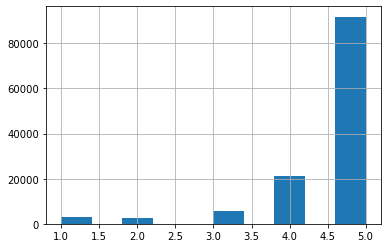

In [231]:
reviews['Label'].hist()

In [232]:
reviews['Label'].value_counts()

5    91803
4    21210
3     5815
1     2793
2     2518
Name: Label, dtype: int64

### Taking values Label1~3

In [233]:
label_neg= "Label == [1,2,3]"
reviews_neg= reviews.query(label_neg)        
reviews_neg

,Review,Label
7,I was disappointed because the name is mislead...,3
13,"Good content, but the course setting does (at ...",3
17,This course does not say anything about digiti...,2
19,"The course content is quite good, though it co...",3
48,I'll start by saying that this course gives a ...,3
...,...,...
123975,以其昏昏使人昭昭,1
123997,教师与学生互动不多,3
124020,以台大來說 這個內容明顯不符合期望,1
124078,課程影片中的面試題和作業對準備面試有一定幫助，讓學生可以提早思考、適應面試時的情況。唯影片中...,3


In [241]:
reviews_neg.head()

,Review,Label
7,I was disappointed because the name is mislead...,3
13,"Good content, but the course setting does (at ...",3
17,This course does not say anything about digiti...,2
19,"The course content is quite good, though it co...",3
48,I'll start by saying that this course gives a ...,3


In [242]:
reviews_neg.shape

(11126, 2)

In [243]:
reviews_neg

,Review,Label
7,I was disappointed because the name is mislead...,3
13,"Good content, but the course setting does (at ...",3
17,This course does not say anything about digiti...,2
19,"The course content is quite good, though it co...",3
48,I'll start by saying that this course gives a ...,3
...,...,...
123975,以其昏昏使人昭昭,1
123997,教师与学生互动不多,3
124020,以台大來說 這個內容明顯不符合期望,1
124078,課程影片中的面試題和作業對準備面試有一定幫助，讓學生可以提早思考、適應面試時的情況。唯影片中...,3


In [245]:
# chin= reviews_neg.iloc[[140088], :]   

reviews_neg.loc[reviews_neg.index == 124078]

,Review,Label
124078,課程影片中的面試題和作業對準備面試有一定幫助，讓學生可以提早思考、適應面試時的情況。唯影片中...,3


In [257]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(reviews_neg['Review'][7], "html5lib")
print(reviews_neg['Review'][:20])


example1.get_text()[:10]

7      I was disappointed because the name is mislead...
13     Good content, but the course setting does (at ...
17     This course does not say anything about digiti...
19     The course content is quite good, though it co...
48     I'll start by saying that this course gives a ...
49     This course doesn't contain any new informatio...
52                     It should be merged with course 1
60                             Full Individuals speaking
61     It should be less repetitive and full of usefu...
64     it could be easily compressed in a two-weeks c...
65     good introduction into the applications of 3D ...
67     This session was too long and a little boring....
70     While there is some interesting content, parti...
71     I do not find very interesting this course. to...
79     A lot of speaking without any sense. Skip it a...
109                        Not according what I expected
141                     good introduction to 3D printing
161    I didn't really care abo

'I was disa'

In [253]:
# reviews_neg.reset_index()

In [260]:
# removal_list =  "‘, ’, ◇, ‘, ”,  ’, ', ·, \“, ·, △, ●,  , ■, (, ), \", >>, `, /, -,∼,=,ㆍ<,>, .,?, !,【,】, …, ◆,%"

letters_only= re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:10]

'I was disa'

In [263]:
# 모두 소문자로 변환한다.
lower_case = letters_only.lower()
# lower_case = letters_only['Review'].str.lower()      # Q str?

In [264]:
lower_case

'i was disappointed because the name is misleading  the course provides a good introduction   overview of the responsibilities of the cto  but has very little specifically digital content  it deals with two speed it in a single short lecture  so of course the treatment is superficial  it is easy to find more in depth material freely available  on the mckinsey website for example '

In [266]:

# 문자를 나눈다. => 토큰화
words = lower_case.split()
print(len(words))
words[:10]

63


['i',
 'was',
 'disappointed',
 'because',
 'the',
 'name',
 'is',
 'misleading',
 'the',
 'course']

In [268]:
# 텍스트 데이터 전처리를 위해 다음을 다운로드 해야함
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [269]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [270]:
# stopwords 를 제거한 토큰들
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

32


['disappointed',
 'name',
 'misleading',
 'course',
 'provides',
 'good',
 'introduction',
 'overview',
 'responsibilities',
 'cto']

In [271]:
import re

In [272]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

wordss = [stemmer.stem(w) for w in words]
# 처리 후 단어
words[:10]


# from nltk.stem.porter import *
# stemmer = PorterStemmer()
# plurals = ['caresses', 'flies', 'dies', 'mules', 'denied']
# singles = [stemmer.stem(plural) for plural in plurals]  # ---> loop through the list and process each element. 

['disappointed',
 'name',
 'misleading',
 'course',
 'provides',
 'good',
 'introduction',
 'overview',
 'responsibilities',
 'cto']

In [273]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

words = [wordnet_lemmatizer.lemmatize(w) for w in words]
# 처리 후 단어
words[:10]

['disappointed',
 'name',
 'misleading',
 'course',
 'provides',
 'good',
 'introduction',
 'overview',
 'responsibility',
 'cto']

In [275]:
def review_to_words(raw_review ):
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. 소문자 변환
    words = letters_only.lower().split()
    # 4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords.words('english'))
    # 5. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return( ' '.join(stemming_words) )

In [278]:
clean_review = review_to_words(reviews_neg['Review'][13])
clean_review

'good content cours set least allow learn content long term due miss read materi'

In [279]:
# 첫 번째 리뷰를 대상으로 전처리 해줬던 내용을 전체 텍스트 데이터를 대상으로 처리한다.
# 전체 리뷰 데이터 수 가져오기
num_reviews = reviews_neg['Review'].size
num_reviews

11126

In [280]:
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [281]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
%time clean_train_reviews = apply_by_multiprocessing(\
    reviews_neg['Review'], review_to_words, workers=4)  